This notebook deals with the contents of section 5.1 of the book.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt
from scipy import stats

# Load and inspcet data

In [2]:
df = pd.read_csv("./data/data-attendance-1.txt")
print(df.count())
df.head(5)

A        50
Score    50
Y        50
dtype: int64


,A,Score,Y
0,0,69,0.286
1,1,145,0.196
2,0,125,0.261
3,1,86,0.109
4,1,158,0.230


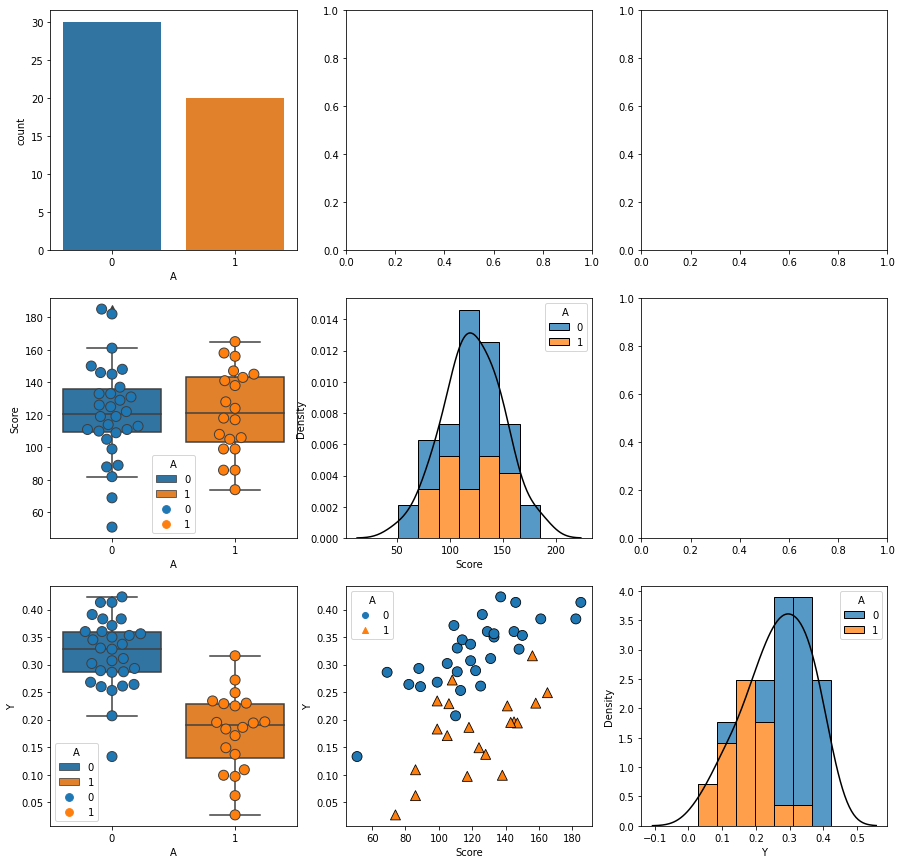

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

ax = axes[0, 0]
sns.countplot(ax=ax, data=df, x="A")


ax = axes[1, 0]
sns.boxplot(ax=ax, data=df, x="A", y="Score", hue="A", dodge=False)
sns.swarmplot(ax=ax, data=df, x="A", y="Score", hue="A", size=10, edgecolors='k', linewidth=1)

ax = axes[1, 1]
sns.histplot(ax=ax, data=df, stat="density", x="Score", hue="A", multiple="stack")
sns.kdeplot(ax=ax, data=df, x="Score", color='k')

ax = axes[2, 0]
sns.boxplot(ax=ax, data=df, x="A", y="Y", hue="A", dodge=False)
sns.swarmplot(ax=ax, data=df, x="A", y="Y", hue="A", size=10, edgecolors='k', linewidth=1)

ax = axes[2, 1]
sns.scatterplot(
    ax=ax, data=df, x="Score", y="Y", 
    style="A", hue="A", 
    markers=['o', '^'],
    s=100,
    edgecolor='k', linewidths=10
)

ax = axes[2, 2]
sns.histplot(ax=ax, data=df, stat="density", x="Y", hue="A", multiple="stack")
sns.kdeplot(ax=ax, data=df, x="Y", color='k')

plt.show()

# Run Stan

In [4]:
model = CmdStanModel(stan_file="model/model5-3.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chap05/model/model5-3


CmdStanModel: name=model5-3
	 stan_file=/workdir/chap05/model/model5-3.stan
	 exe_file=/workdir/chap05/model/model5-3
	 compiler_optons=stanc_options=None, cpp_options=None


In [5]:
data = {
    "N": len(df),
    "A": df["A"].values,
    "Score": df["Score"].values/200.0,
    "Y": df["Y"].values
}

In [6]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


# Access the result

In [7]:
print(type(fit))
print(fit)

<class 'cmdstanpy.stanfit.CmdStanMCMC'>
CmdStanMCMC: model=model5-3 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmp9ki3_ta4/model5-3-202009180839-1-wsiz29kg.csv
	/tmp/tmp9ki3_ta4/model5-3-202009180839-2-hqp9lost.csv
	/tmp/tmp9ki3_ta4/model5-3-202009180839-3-3azvlhfn.csv
	/tmp/tmp9ki3_ta4/model5-3-202009180839-4-zh0hkaeq.csv
 output_files:
	/tmp/tmp9ki3_ta4/model5-3-202009180839-1-wsiz29kg-stdout.txt
	/tmp/tmp9ki3_ta4/model5-3-202009180839-2-hqp9lost-stdout.txt
	/tmp/tmp9ki3_ta4/model5-3-202009180839-3-3azvlhfn-stdout.txt
	/tmp/tmp9ki3_ta4/model5-3-202009180839-4-zh0hkaeq-stdout.txt


In [8]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 111)


In [9]:
print(fit.column_names)

('lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__', 'b1', 'b2', 'b3', 'sigma', 'mu.1', 'mu.2', 'mu.3', 'mu.4', 'mu.5', 'mu.6', 'mu.7', 'mu.8', 'mu.9', 'mu.10', 'mu.11', 'mu.12', 'mu.13', 'mu.14', 'mu.15', 'mu.16', 'mu.17', 'mu.18', 'mu.19', 'mu.20', 'mu.21', 'mu.22', 'mu.23', 'mu.24', 'mu.25', 'mu.26', 'mu.27', 'mu.28', 'mu.29', 'mu.30', 'mu.31', 'mu.32', 'mu.33', 'mu.34', 'mu.35', 'mu.36', 'mu.37', 'mu.38', 'mu.39', 'mu.40', 'mu.41', 'mu.42', 'mu.43', 'mu.44', 'mu.45', 'mu.46', 'mu.47', 'mu.48', 'mu.49', 'mu.50', 'y_pred.1', 'y_pred.2', 'y_pred.3', 'y_pred.4', 'y_pred.5', 'y_pred.6', 'y_pred.7', 'y_pred.8', 'y_pred.9', 'y_pred.10', 'y_pred.11', 'y_pred.12', 'y_pred.13', 'y_pred.14', 'y_pred.15', 'y_pred.16', 'y_pred.17', 'y_pred.18', 'y_pred.19', 'y_pred.20', 'y_pred.21', 'y_pred.22', 'y_pred.23', 'y_pred.24', 'y_pred.25', 'y_pred.26', 'y_pred.27', 'y_pred.28', 'y_pred.29', 'y_pred.30', 'y_pred.31', 'y_pred.32', 'y_pred.33', 'y_pred.34', '

In [10]:
fit.stan_variables()

{'b1': array([0.0844427, 0.0856071, 0.153501 , ..., 0.115033 , 0.140084 ,
        0.153455 ]),
 'b2': array([-0.122162, -0.119081, -0.151459, ..., -0.124794, -0.154404,
        -0.159075]),
 'b3': array([0.368278, 0.382241, 0.268155, ..., 0.32863 , 0.301779, 0.289621]),
 'sigma': array([0.0533008, 0.0533574, 0.044041 , ..., 0.0407558, 0.0549571,
        0.0553246]),
 'mu': array([[0.211499, 0.229282, 0.314616, ..., 0.360651, 0.26674 , 0.144578],
        [0.21748 , 0.24365 , 0.324507, ..., 0.372288, 0.274816, 0.155735],
        [0.246015, 0.196455, 0.321098, ..., 0.354618, 0.286238, 0.134779],
        ...,
        [0.22841 , 0.228495, 0.320426, ..., 0.361505, 0.277704, 0.15291 ],
        [0.244198, 0.204469, 0.328696, ..., 0.366418, 0.289465, 0.13506 ],
        [0.253375, 0.204356, 0.334469, ..., 0.370672, 0.296818, 0.137744]]),
 'y_pred': array([[0.237016, 0.208994, 0.280994, ..., 0.390881, 0.248393, 0.129448],
        [0.169347, 0.374532, 0.306179, ..., 0.369455, 0.169146, 0.15739 ],


In [11]:
fit_summary = fit.summary()
fit_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,120.823000,0.041742,1.517950,117.801000,121.185000,122.567000,1322.46,1671.88,1.000460
b1,0.123515,0.000830,0.034173,0.067953,0.123605,0.178969,1694.95,2142.79,1.000850
b2,-0.143883,0.000323,0.015469,-0.169724,-0.143796,-0.118466,2294.91,2901.28,1.000060
b3,0.324562,0.001302,0.053453,0.238809,0.325396,0.411739,1685.59,2130.96,1.001290
sigma,0.051823,0.000112,0.005448,0.043643,0.051440,0.061499,2361.79,2985.82,0.999805
...,...,...,...,...,...,...,...,...,...
y_pred[46],0.290000,0.000840,0.053000,0.210000,0.290000,0.380000,3939.00,4979.00,1.000000
y_pred[47],0.210000,0.000960,0.056000,0.110000,0.210000,0.300000,3459.00,4373.00,1.000000
y_pred[48],0.370000,0.000890,0.054000,0.280000,0.370000,0.460000,3665.00,4633.00,1.000000


In [12]:
# check convergence
fit_summary[fit_summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [13]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmp9ki3_ta4/model5-3-202009180839-1-wsiz29kg.csv, /tmp/tmp9ki3_ta4/model5-3-202009180839-2-hqp9lost.csv, /tmp/tmp9ki3_ta4/model5-3-202009180839-3-3azvlhfn.csv, /tmp/tmp9ki3_ta4/model5-3-202009180839-4-zh0hkaeq.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmp9ki3_ta4/model5-3-202009180839-1-wsiz29kg.csv, /tmp/tmp9ki3_ta4/model5-3-202009180839-2-hqp9lost.csv, /tmp/tmp9ki3_ta4/model5-3-202009180839-3-3azvlhfn.csv, /tmp/tmp9ki3_ta4/model5-3-202009180839-4-zh0hkaeq.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Plot results

In [14]:
print(fit.stan_variable("y_pred").shape)
y_pred_percentiles = np.percentile(fit.stan_variable("y_pred"), [10.0, 50.0, 90.0], axis=0)
print(y_pred_percentiles.shape)

(4000, 50)
(3, 50)


Text(0, 0.5, 'predicted')

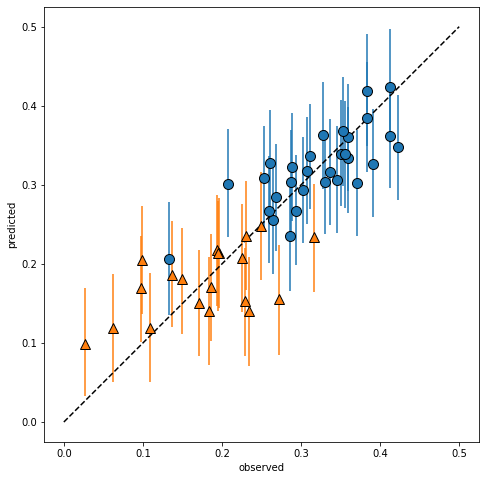

In [15]:
# observation vs. prediction

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

idx0 = np.where(df["A"].values == 0)[0]
idx1 = np.where(df["A"].values == 1)[0]

ax.errorbar(
    x=df["Y"].values[idx0], 
    y=y_pred_percentiles[1][idx0], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx0] - y_pred_percentiles[1][idx0]),
    fmt='o',
    markersize=10,
    markeredgecolor='k'
)

ax.errorbar(
    x=df["Y"].values[idx1], 
    y=y_pred_percentiles[1][idx1], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx1] - y_pred_percentiles[1][idx1]),
    fmt='^',
    markersize=10,
    markeredgecolor='k'
)

ax.plot([0.0, 0.5], [0.0, 0.5], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("observed")
ax.set_ylabel("predicted")

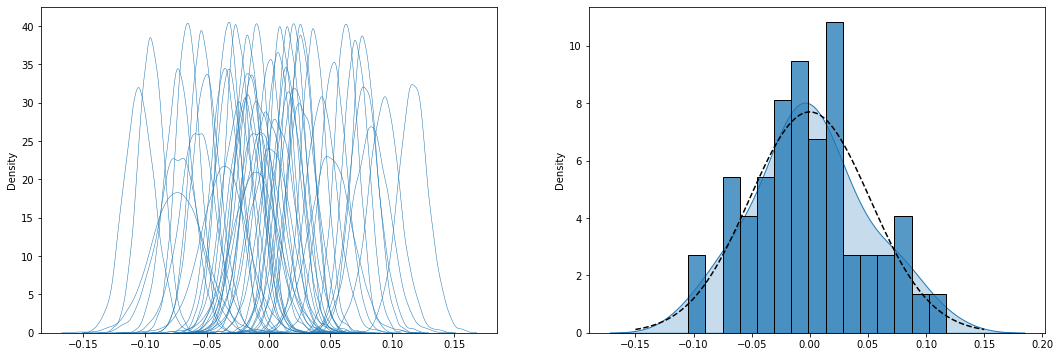

In [16]:
# residual error
# This is the contents of Exercise (1)

res_error = df["Y"].values - fit.stan_variable("mu")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i in range(len(df)):
    sns.kdeplot(ax=axes[0], x=res_error[:,i], color='C0', linewidth=0.5)

ax = axes[1]
xx = np.linspace(-0.15, 0.15, 101)
yy = stats.norm(loc=0, scale=fit.stan_variable("sigma").mean()).pdf(xx)
sns.kdeplot(ax=ax, x=res_error.mean(axis=0), fill=True, color="C0")
sns.histplot(ax=ax, x=res_error.mean(axis=0), bins=15, stat="density")
plt.plot(xx, yy, 'k--')